In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# plt.rcParams['svg.fonttype'] = 'none'

In [2]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

In [3]:
def CalcPQFromUMICnts(raw_cnts):
    PQ_prop = []
    PQ_Ctrl_normed = []
    for i in range(len(raw_cnts)):
        PQ_prop.append([x / sum(raw_cnts[i]) for x in raw_cnts[i]])
        PQ_Ctrl_normed.append([x / (raw_cnts[i][7] + raw_cnts[i][8]) for x in raw_cnts[i]])

    PQ_prop_avg = []
    PQ_Ctrl_normed_avg = []
    for i in range(len(raw_cnts[0])):
        curr_col = [x[i] for x in PQ_prop]
        PQ_prop_avg.append(np.mean(curr_col))

        curr_norm_col = [x[i] for x in PQ_Ctrl_normed]
        PQ_Ctrl_normed_avg.append(np.mean(curr_norm_col))

    return PQ_prop, PQ_prop_avg, PQ_Ctrl_normed, PQ_Ctrl_normed_avg

In [4]:
# Numbers migrated from outputs of running PQSeq_Data_Analysis.py; see below for the annotation of samples
S02316_PQ_raw = [
    [9389,85529,4311,8530,12584,57254,3739,5357,25117,3988,1066,2489],
    [8930,140300,9241,10907,14070,51082,6487,7572,27176,5089,1516,4910],
    [6650,75965,3111,6112,9827,36340,2841,4215,17242,13120,844,1918],
    [4101,41501,2869,4155,5168,28837,1726,3104,15610,9074,632,2163],
    [6445,106968,3502,6628,10605,27904,4468,4489,13289,3104,856,2474],
    [5838,112139,2504,6289,11532,27313,2864,3359,13325,2875,794,1711],
    [6167,58838,1311,3940,7180,12711,3675,2089,5530,2745,449,730],
    [12204,72586,3490,6785,12661,21364,6457,4257,10377,4199,1301,2184],
]

all_PQ_avg = []
all_PQ_ctrl_normed_avg = []
# for idx in range(int(len(S02316_PQ_raw) / 2)):
for idx in range(len(S02316_PQ_raw)):
    curr_PQ_prop, curr_PQ_avg, curr_PQ_ctrl_normed, curr_PQ_ctrl_normed_avg = CalcPQFromUMICnts([S02316_PQ_raw[idx]])
    all_PQ_avg.append(curr_PQ_avg)
    all_PQ_ctrl_normed_avg.append(curr_PQ_ctrl_normed_avg)

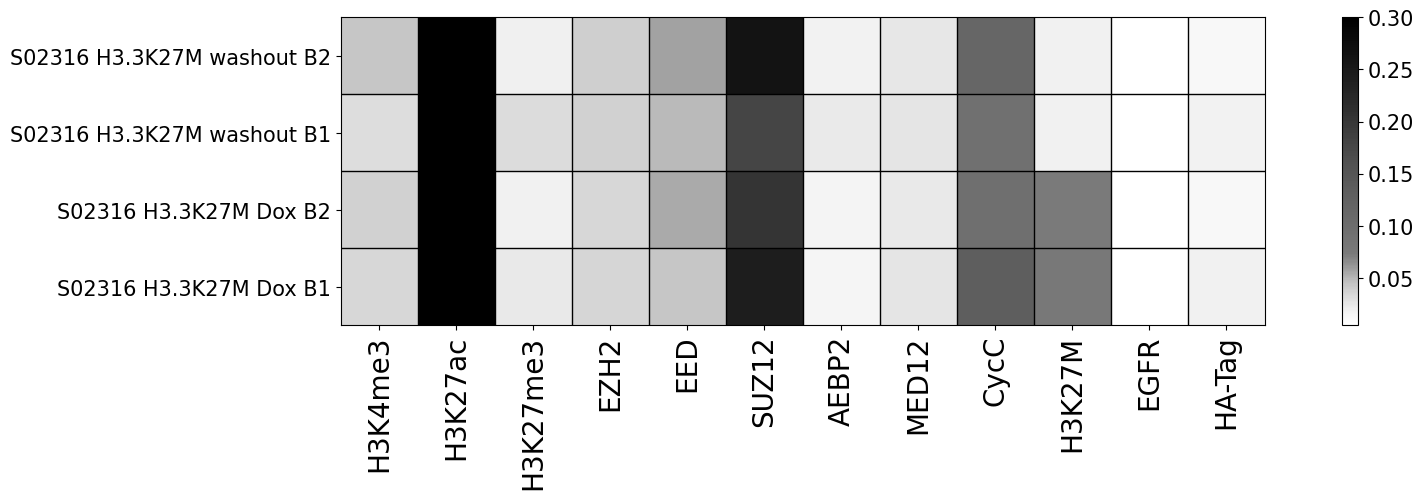

In [5]:
color_thres_num = 60
colors1 = plt.cm.Greys(np.linspace(0, 0.6, color_thres_num))
colors2 = plt.cm.Greys(np.linspace(0.6, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Multiple plots together as one figure; Prod263
plot_data = (all_PQ_avg)[0:4]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, cmap = customized_cmap, vmax = 0.3)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
y_labels = [
    "S02316 H3.3K27M washout B2",
    "S02316 H3.3K27M washout B1",
    "S02316 H3.3K27M Dox B2",
    "S02316 H3.3K27M Dox B1",
    "S02316 H3.1K27M washout B2",
    "S02316 H3.1K27M washout B1",
    "S02316 H3.1K27M Dox B2",
    "S02316 H3.1K27M Dox B1",
]
ax.set_yticklabels(y_labels[0:4], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_S02316_33_PQ_depthnorm.svg", dpi = 1200)

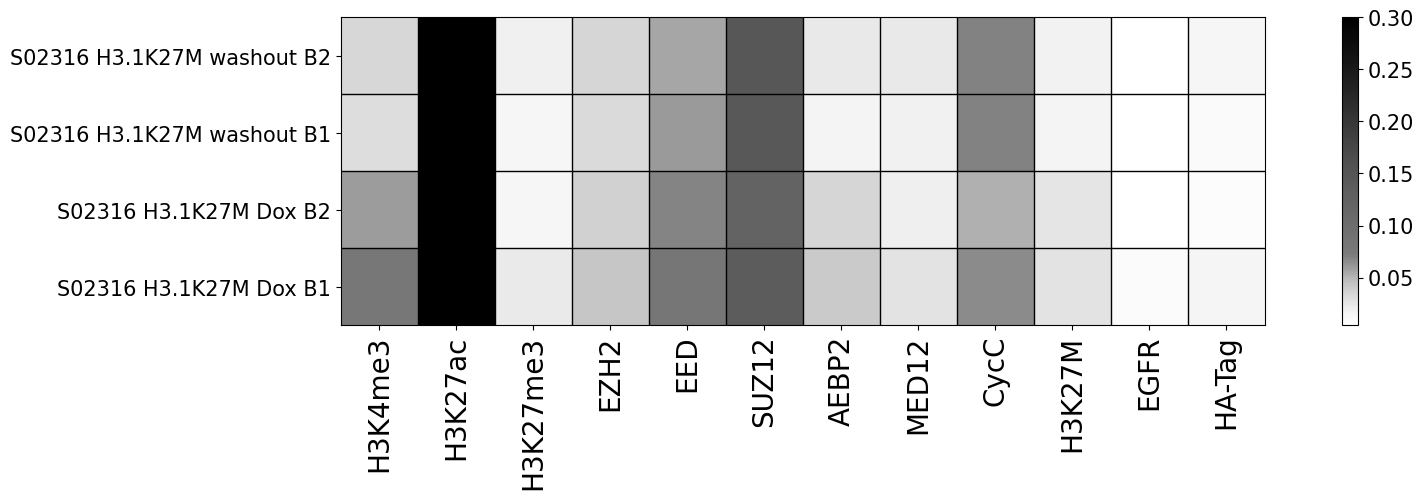

In [6]:
# Multiple plots together as one figure; Prod263
plot_data = (all_PQ_avg)[4:8]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, cmap = customized_cmap, vmax = 0.3)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
y_labels = [
    "S02316 H3.3K27M washout B2",
    "S02316 H3.3K27M washout B1",
    "S02316 H3.3K27M Dox B2",
    "S02316 H3.3K27M Dox B1",
    "S02316 H3.1K27M washout B2",
    "S02316 H3.1K27M washout B1",
    "S02316 H3.1K27M Dox B2",
    "S02316 H3.1K27M Dox B1",
]
ax.set_yticklabels(y_labels[4:8], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_S02316_31_PQ_depthnorm.svg", dpi = 1200)